In [80]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Lectura de datos

In [81]:

df = pd.read_csv(r'C:\Users\mpj_0\Documents\Diplomado IA\Modulo_3\Reto_4\rama_2023_05_missing_outliers_limited.csv')

In [82]:
df.head()

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno 
from statsmodels.tsa.seasonal import seasonal_decompose

# 2. Gráfico de las variables:

In [84]:
def plot_time_series(df, variable, ylabel, title, start_date=None, end_date=None):
    # Configurar el tamaño de la figura del gráfico
    plt.figure(figsize=(15, 5))
    
    column = f"{variable}"
        
        # Verificar si la columna existe en el DataFrame
    if column in df.columns:
            # Graficar la serie de tiempo de la columna
            plt.plot(df.index, df[column], label=column)
    else:
            # Imprimir un mensaje si la columna no se encuentra en el DataFrame
            print(f"Columna {column} no encontrada en el DataFrame")

    # Etiqueta del eje x
    plt.xlabel('Fecha')
    # Etiqueta del eje y
    plt.ylabel(ylabel)
    # Título del gráfico
    plt.title(title)
    # Mostrar la leyenda del gráfico
    plt.legend()
    # Mostrar el gráfico
    plt.show()

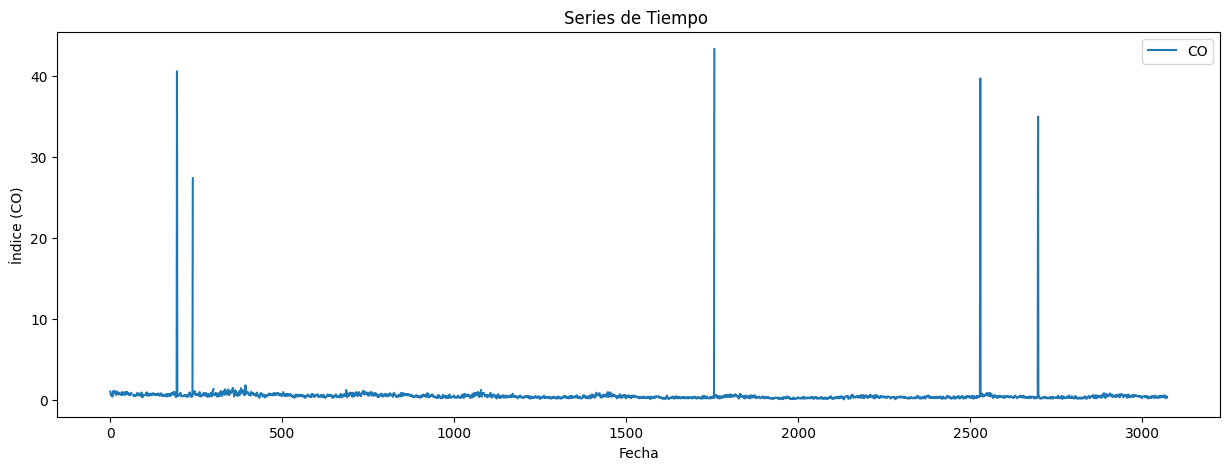

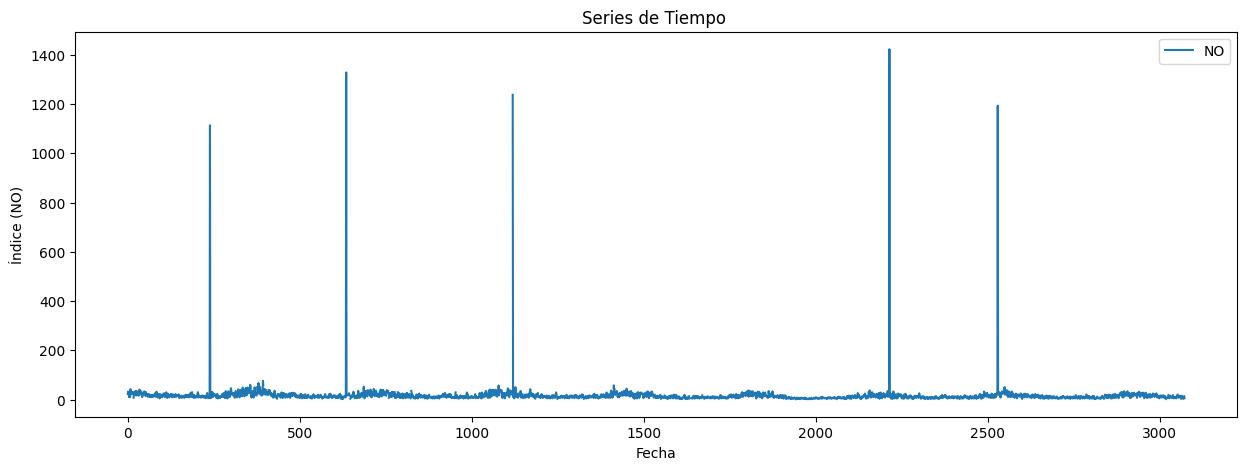

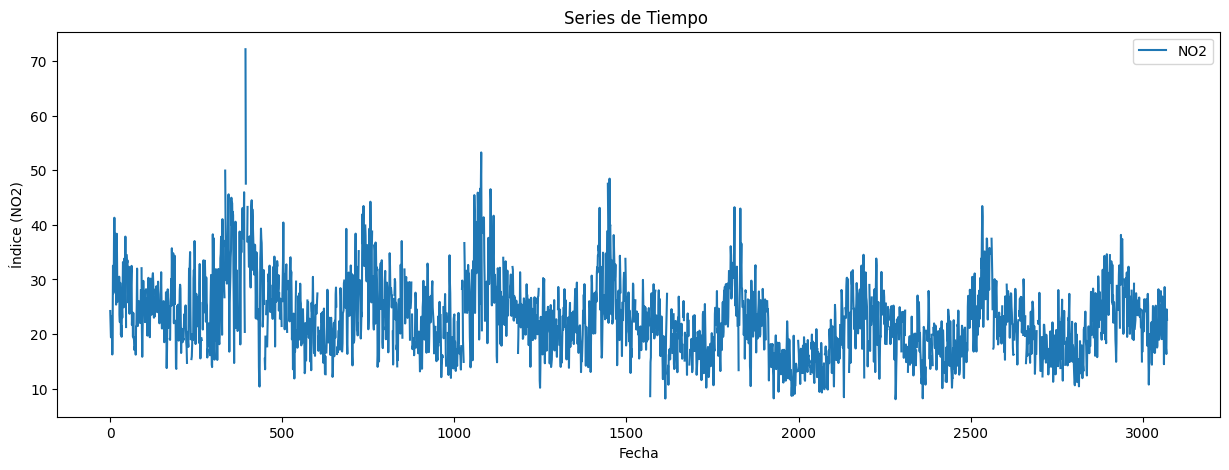

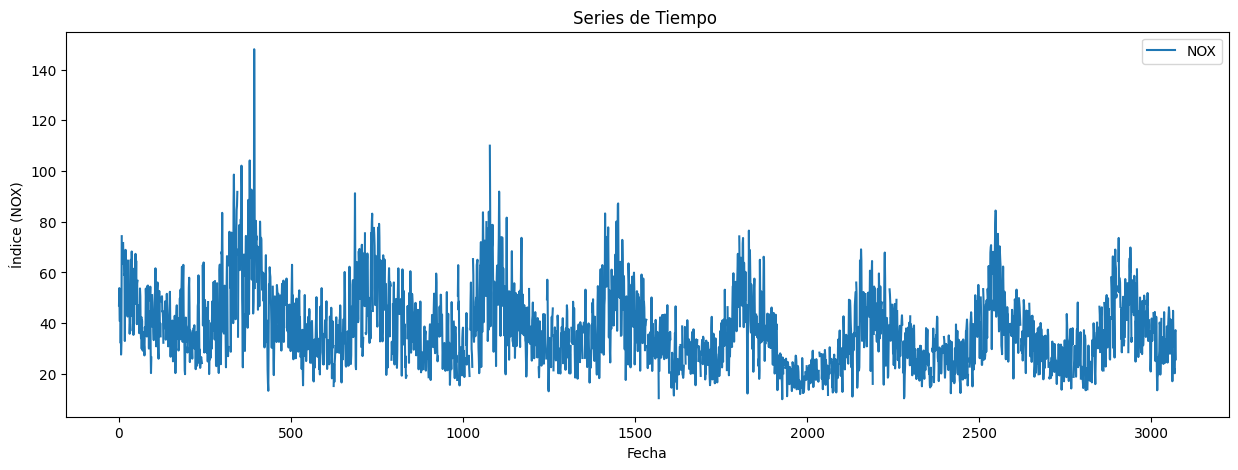

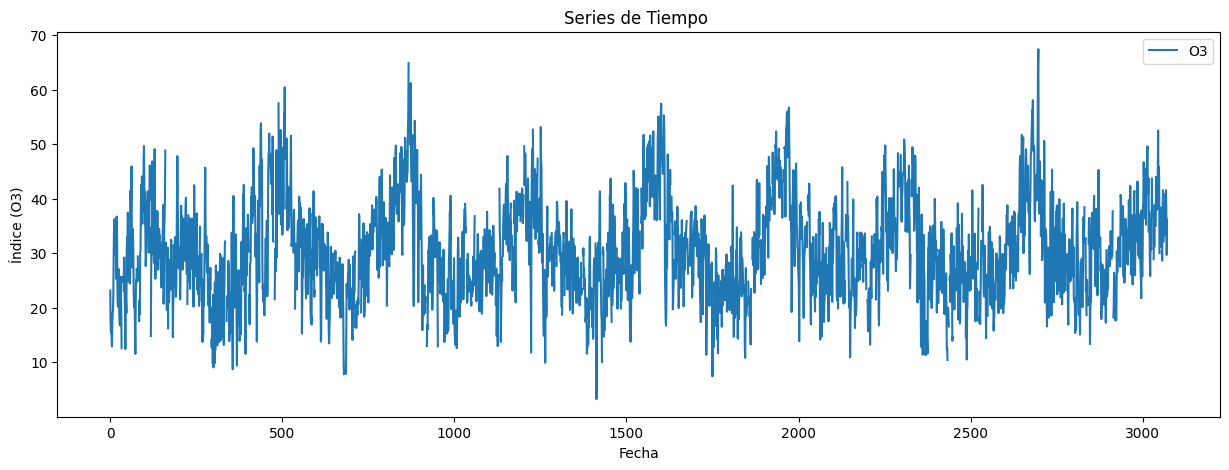

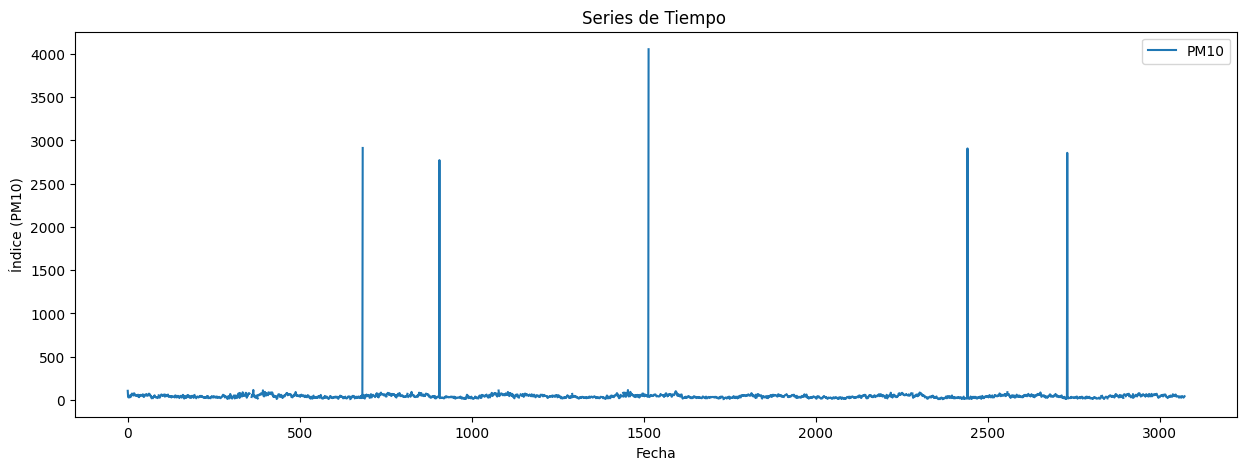

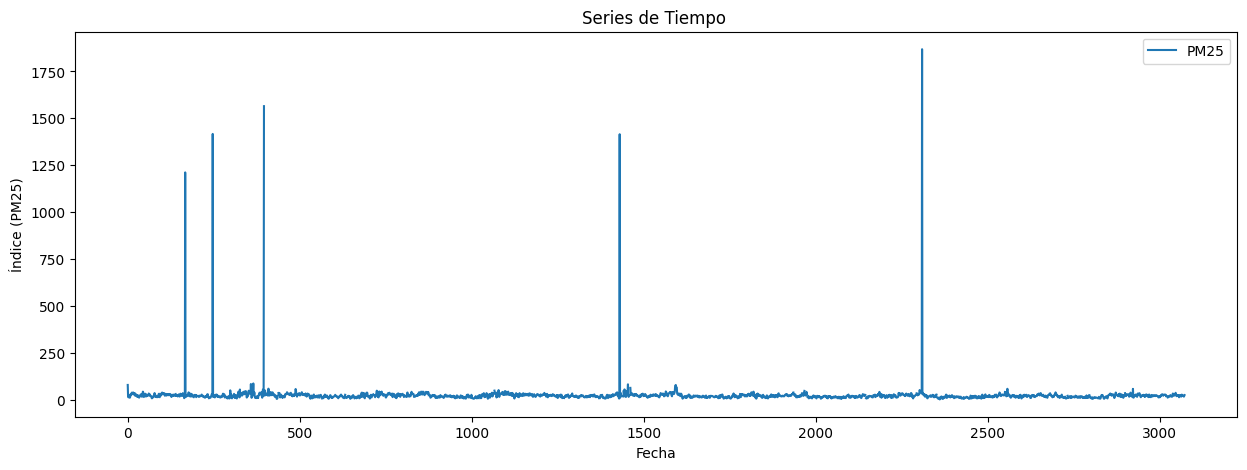

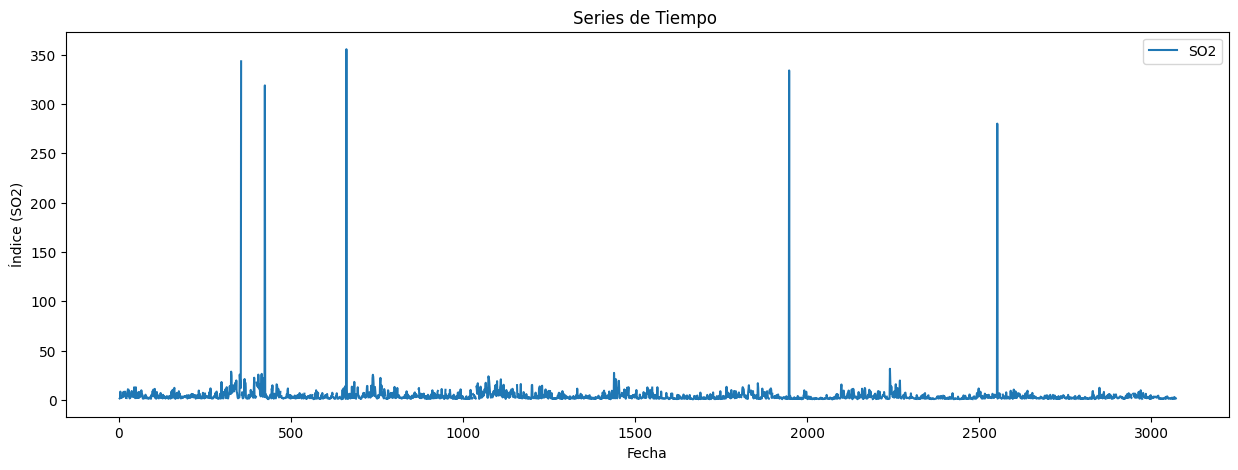

In [85]:

# Llamar a la función para graficar PM10 en las zonas específicas con el rango de fechas indicado
plot_time_series(df, 'CO', 'Índice (CO)', 'Series de Tiempo ', start_date=None, end_date=None)
plot_time_series(df, 'NO', 'Índice (NO)', 'Series de Tiempo ', start_date=None, end_date=None)
plot_time_series(df, 'NO2', 'Índice (NO2)', 'Series de Tiempo ', start_date=None, end_date=None)
plot_time_series(df, 'NOX', 'Índice (NOX)', 'Series de Tiempo ', start_date=None, end_date=None)
plot_time_series(df, 'O3', 'Índice (O3)', 'Series de Tiempo ', start_date=None, end_date=None)
plot_time_series(df, 'PM10', 'Índice (PM10)', 'Series de Tiempo ', start_date=None, end_date=None)
plot_time_series(df, 'PM25', 'Índice (PM25)', 'Series de Tiempo ', start_date=None, end_date=None)
plot_time_series(df, 'SO2', 'Índice (SO2)', 'Series de Tiempo ', start_date=None, end_date=None)


<Axes: >

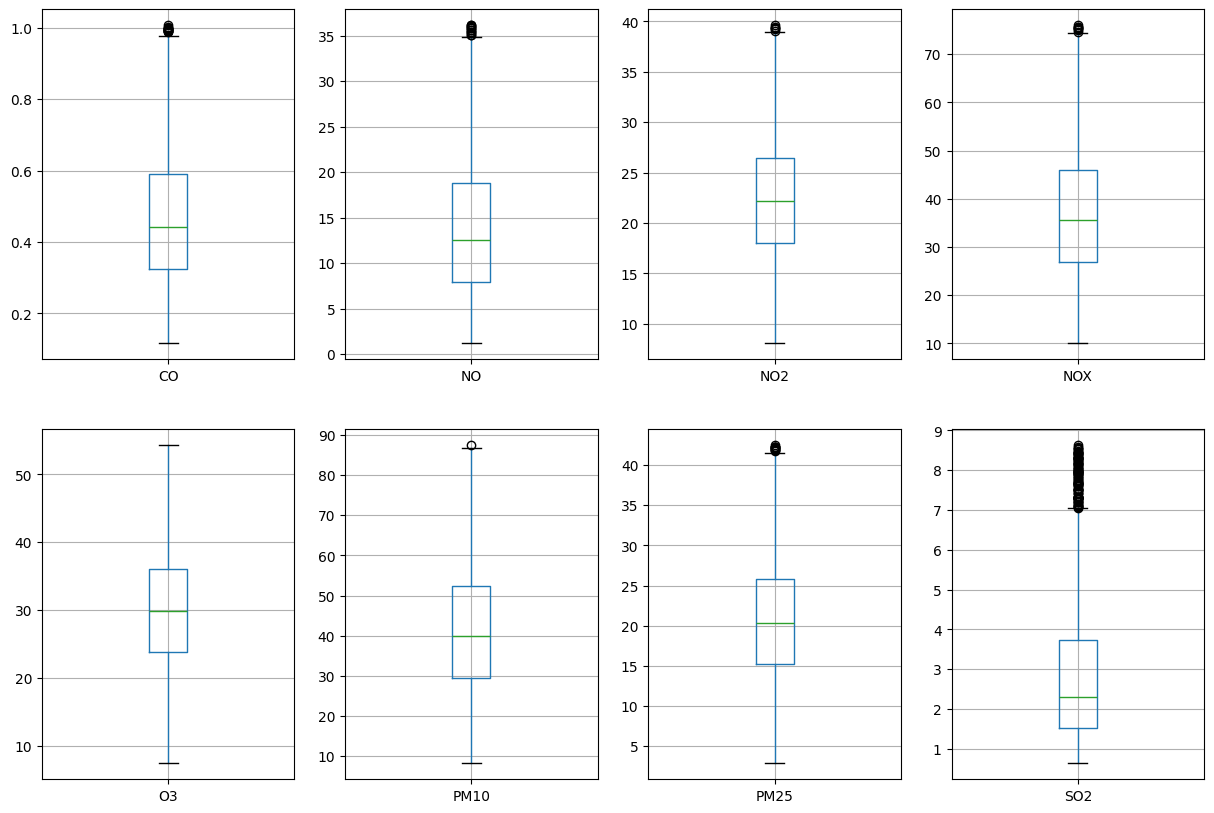

In [124]:
fig, axs = plt.subplots(2,4,figsize = (15,10))

df.boxplot(column='CO', ax= axs[0,0])
df.boxplot(column='NO',ax= axs[0,1])
df.boxplot(column='NO2',ax= axs[0,2])
df.boxplot(column='NOX',ax= axs[0,3])
df.boxplot(column='O3',ax= axs[1,0])
df.boxplot(column='PM10',ax= axs[1,1])
df.boxplot(column='PM25',ax= axs[1,2])
df.boxplot(column='SO2',ax= axs[1,3])

In [ ]:
def add_predictions(model, data, input_columns, output_columns, time_steps, future_steps):
    """
    Añade múltiples predicciones al DataFrame de una sola vez.
    
    Args:
        model: Modelo entrenado.
        data (pd.DataFrame): DataFrame con los datos originales.
        input_columns (list of str): Lista de nombres de las columnas de entrada.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
        
    Returns:
        pd.DataFrame: DataFrame con las predicciones añadidas.
    """
    # Escaladores
    scalers = {col: MinMaxScaler() for col in data.columns}
    
    # Escalar datos
    scaled_data = data.copy()
    for col in data.columns:
        scaled_data[col] = scalers[col].fit_transform(data[[col]])
    
    # Seleccionar la última secuencia de time_steps
    last_seq = scaled_data[input_columns].values[-time_steps:]
    last_seq = np.expand_dims(last_seq, axis=0)
    
    # Realizar la predicción
    predictions_scaled = model.predict(last_seq)
    
    # Reescalar las predicciones
    predictions = np.zeros((future_steps, len(output_columns)))
    for i, col in enumerate(output_columns):
        predictions[:, i] = scalers[col].inverse_transform(predictions_scaled[:, i::len(output_columns)].reshape(-1, 1)).reshape(-1)
    
    # Crear un DataFrame para las predicciones
    predictions_df = pd.DataFrame(predictions, columns=output_columns)
    
    # Añadir las predicciones al DataFrame original
    data_with_predictions = pd.concat([data, predictions_df], ignore_index=True)
    
    return data_with_predictions

def plot_with_predictions(data, output_columns, plot_steps, future_steps):
    """
    Visualiza los datos actuales y las predicciones.
    
    Args:
        data (pd.DataFrame): DataFrame con los datos actuales y las predicciones.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        plot_steps (int): Número de pasos de tiempo a graficar antes de la predicción.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
    """
    plt.figure(figsize=(14, 5))
    for col in output_columns:
        plt.plot(data.index[-(plot_steps + future_steps):], data[col].iloc[-(plot_steps + future_steps):], label=f'Actual {col}')
        plt.plot(data.index[-future_steps:], data[col].iloc[-future_steps:], 'ro-', label=f'Predicción {col}')
    
    plt.title('Predicciones y datos actuales')
    plt.legend()
    plt.show()
plot_steps = 12  # Número de pasos de tiempo a graficar antes de la predicción

# Añadir predicciones y visualizar
df_with_predictions = add_predictions(model_simple_rnn, df, input_columns, output_columns, time_steps, future_steps)
plot_with_predictions(df_with_predictions, output_columns, plot_steps, future_steps)

# 3. Identificación y manejo de valores atípicos


## Realiza una condición para seleccionar los datos atípicos y sustitúyelos por un valor np.nan

In [86]:
# Convertir la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Establecer 'fecha' como índice del DataFrame
df.set_index('fecha', inplace=True)



In [79]:
# Definir una función para reemplazar valores atípicos con np.nan
def remplazar(datos):
    Q1 = datos.quantile(0.25)
    Q3 = datos.quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir los límites para identificar valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar y reemplazar valores atípicos
    datos[(datos < lower_bound) | (datos > upper_bound)] = np.nan
    
    return datos

In [87]:
# Aplicar la función 
df_rem = remplazar(df)

# Mostrar las primeras filas del DataFrame después del reemplazo
print(df_rem.head())

                  CO         NO        NO2        NOX         O3       PM10  \
fecha                                                                         
2015-01-01       NaN  22.765528  24.225155  46.987578  23.175150        NaN   
2015-01-02  0.807585  32.249608  21.554160  53.800628  17.268366  36.687845   
2015-01-03  0.640755  21.686916  19.394081  41.071651  15.486486  29.269022   
2015-01-04  0.726940  24.606272  19.560976        NaN  17.329032  39.961538   
2015-01-05  0.530815  11.443182  20.990260  32.439935  14.470588  31.855643   

                 PM25       SO2  
fecha                            
2015-01-01        NaN       NaN  
2015-01-02  15.449438       NaN  
2015-01-03  12.915129  1.436937  
2015-01-04  16.838284  1.809061  
2015-01-05        NaN  8.315789  


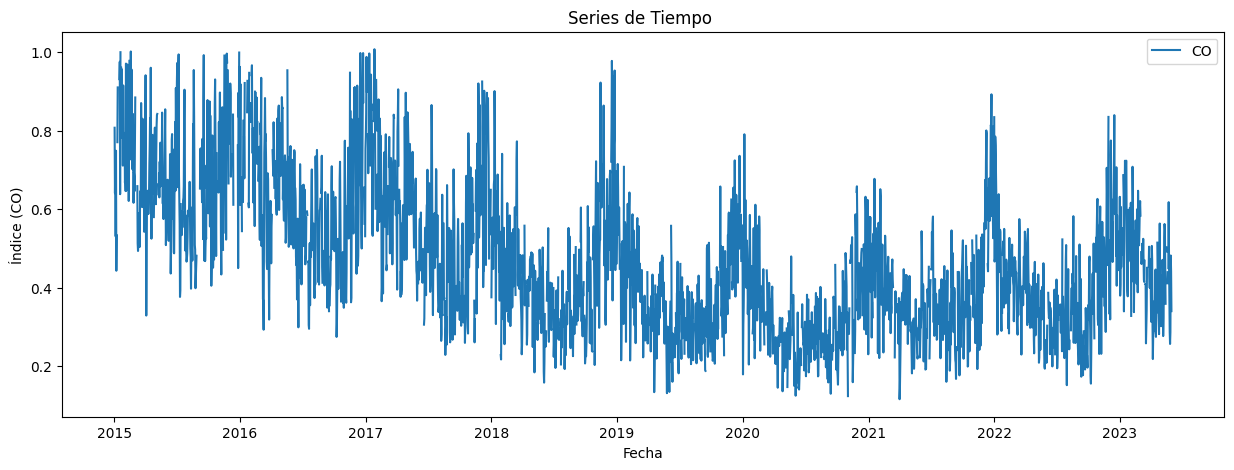

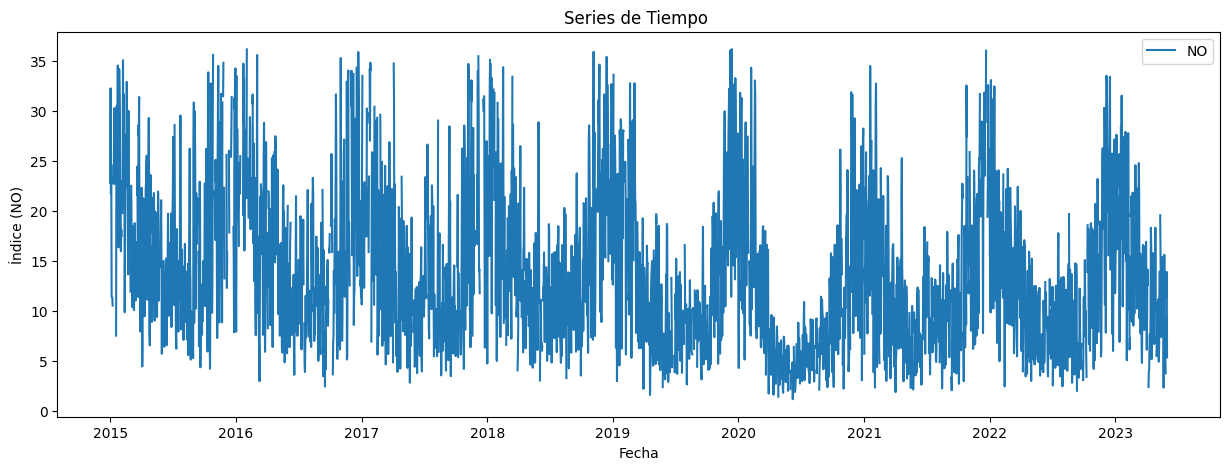

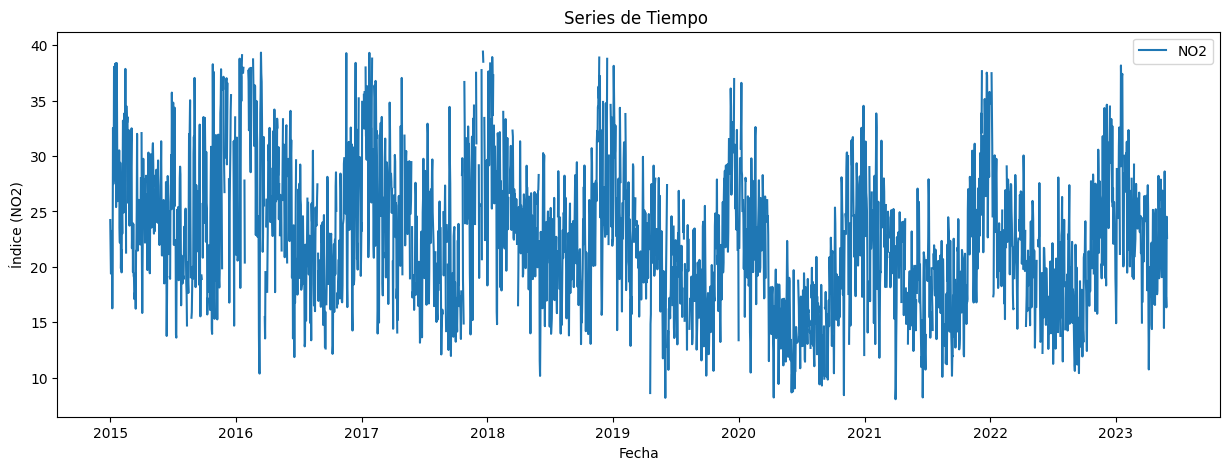

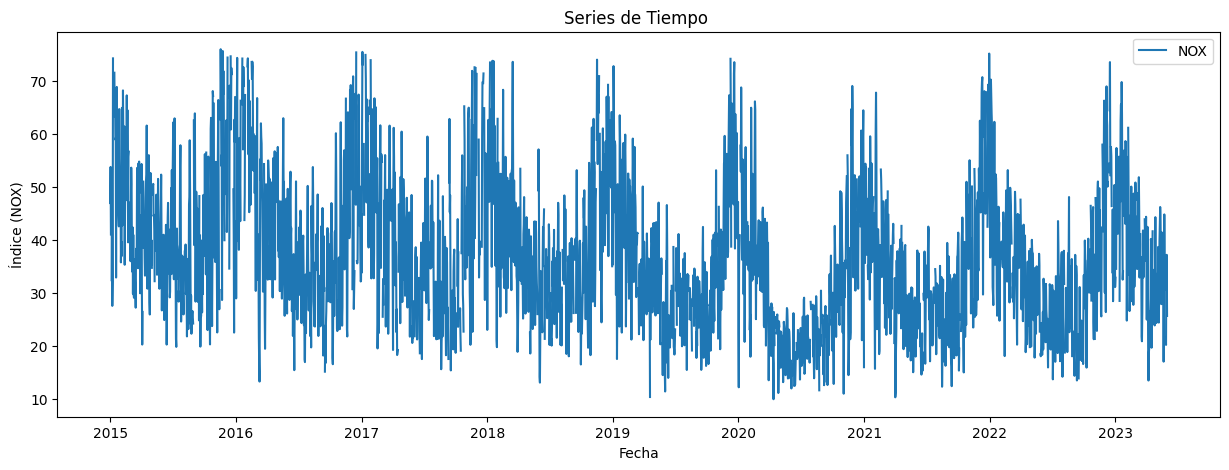

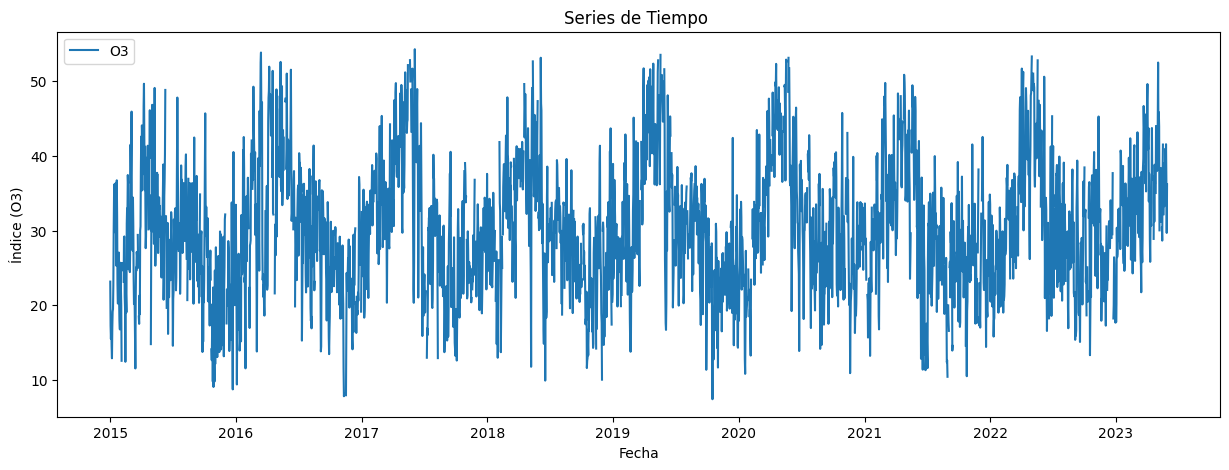

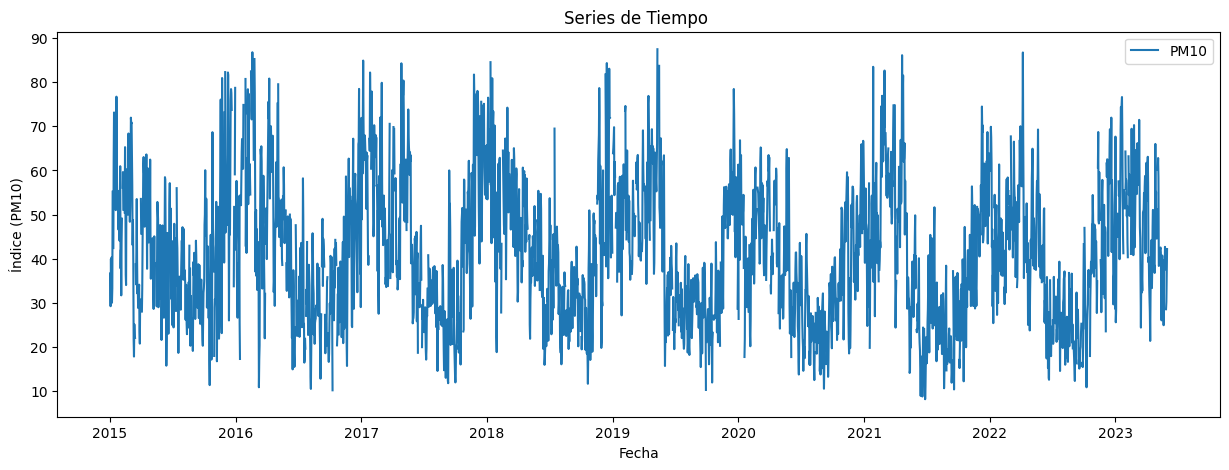

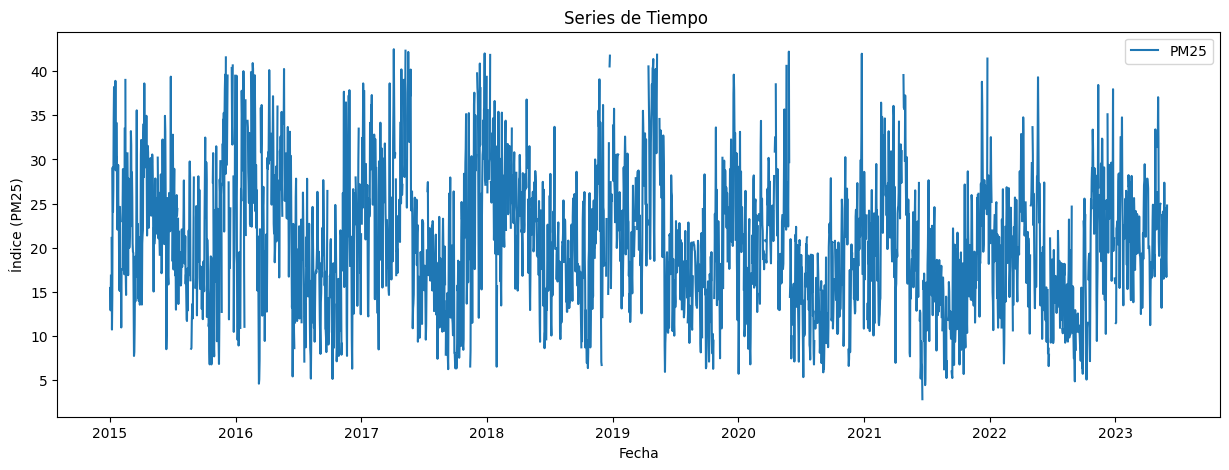

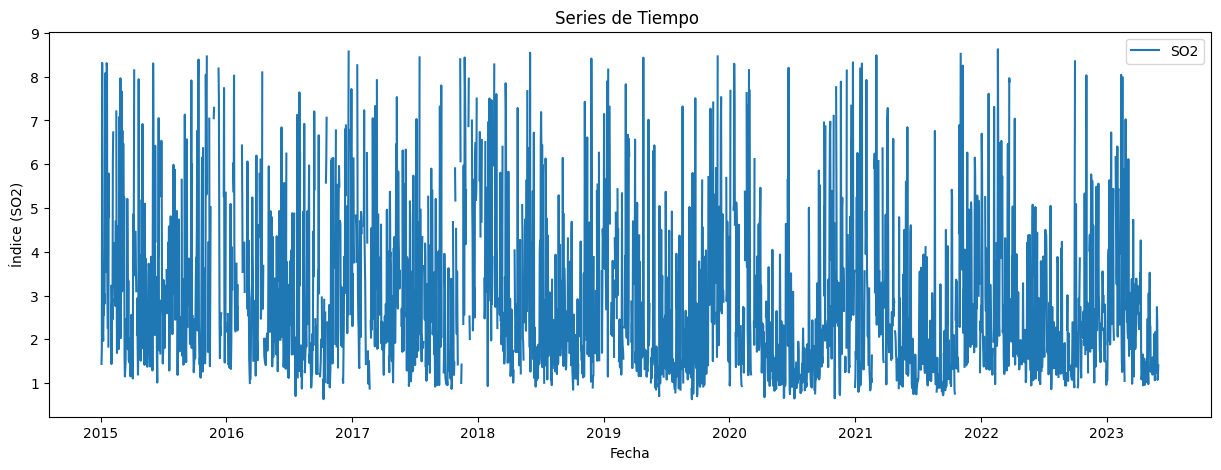

In [88]:
plot_time_series(df_rem, 'CO', 'Índice (CO)', 'Series de Tiempo ', start_date=None, end_date=None)
plot_time_series(df_rem, 'NO', 'Índice (NO)', 'Series de Tiempo ', start_date=None, end_date=None)
plot_time_series(df_rem, 'NO2', 'Índice (NO2)', 'Series de Tiempo ', start_date=None, end_date=None)
plot_time_series(df_rem, 'NOX', 'Índice (NOX)', 'Series de Tiempo ', start_date=None, end_date=None)
plot_time_series(df_rem, 'O3', 'Índice (O3)', 'Series de Tiempo ', start_date=None, end_date=None)
plot_time_series(df_rem, 'PM10', 'Índice (PM10)', 'Series de Tiempo ', start_date=None, end_date=None)
plot_time_series(df_rem, 'PM25', 'Índice (PM25)', 'Series de Tiempo ', start_date=None, end_date=None)
plot_time_series(df_rem, 'SO2', 'Índice (SO2)', 'Series de Tiempo ', start_date=None, end_date=None)

## Realiza la imputación de los valores nulos utilizando alguno de los métodos visto en clases

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

Primeras filas del DataFrame filtrado:
                  CO         NO        NO2        NOX         O3       PM10  \
fecha                                                                         
2016-01-01  0.962269  13.831140  29.712719  43.567982  33.471014        NaN   
2016-01-02  0.610673   7.929515  21.085903  29.006608  24.540835  42.101990   
2016-01-03  0.711463  16.601382  26.645161  43.267281  19.586792  45.245033   
2016-01-04  0.916995  33.433566  31.664336  65.149184   9.396190  57.624709   
2016-01-05       NaN        NaN  24.656085  74.378307  17.697917  35.979960   

                 PM25       SO2  
fecha                            
2016-01-01        NaN       NaN  
2016-01-02  24.508711  5.218673  
2016-01-03  28.209677       NaN  
2016-01-04  39.484099       NaN  
2016-01-05  21.185915  2.578249  


<Figure size 1200x600 with 0 Axes>

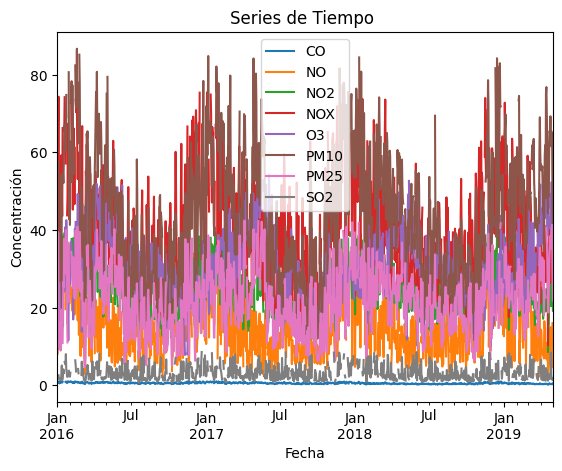


Número de valores nulos antes de la imputación:
CO       74
NO      115
NO2     107
NOX      78
O3       75
PM10     72
PM25     84
SO2     204
dtype: int64


In [90]:
# Filtrar el DataFrame para obtener las columnas  en el rango de fechas especificado
df_impute = df_rem[['CO', 'NO','NO2','NOX','O3','PM10','PM25','SO2']].loc['2016-01-01':'2019-05-01']

# Mostrar las primeras filas del DataFrame filtrado
print("Primeras filas del DataFrame filtrado:")
print(df_impute.head())

# Graficar las series de tiempo de 'CE-CO' y 'CE-PM10'
plt.figure(figsize=(12, 6))
df_impute.plot()
plt.title('Series de Tiempo ')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()

# Contar y mostrar el número de valores nulos en cada columna del DataFrame filtrado
print("\nNúmero de valores nulos antes de la imputación:")
print(df_impute.isnull().sum())

# Crear una instancia del imputador KNN con 12 vecinos
imputer_knn = KNNImputer(n_neighbors=12)

# Aplicar el imputador KNN para llenar los valores nulos en el DataFrame
df_impute.loc[:, :] = imputer_knn.fit_transform(df_impute)

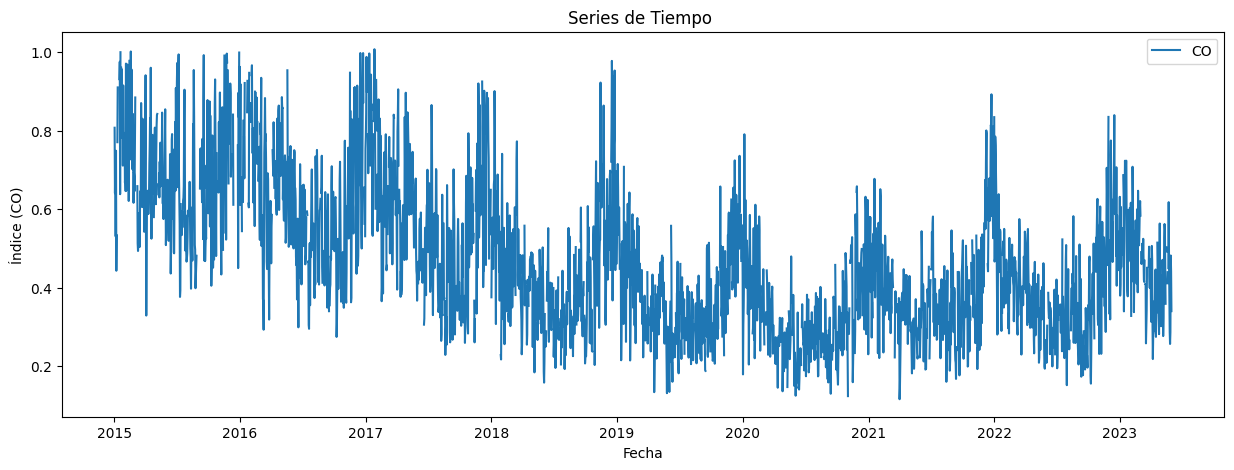

In [91]:
plot_time_series(df_rem, 'CO', 'Índice (CO)', 'Series de Tiempo ', start_date=None, end_date=None)

In [92]:
df_impute.isnull().sum()

CO      0
NO      0
NO2     0
NOX     0
O3      0
PM10    0
PM25    0
SO2     0
dtype: int64

# 4. Realiza un análisis descriptivo de las series de tiempo


se puede observar una cierta estacionalidad


# 5. Modelado y predicción

In [93]:
df_impute.to_csv('Datos_procesados.csv',index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras import backend as K


def rmse(y_true, y_pred):
    """
    Calcula el error cuadrático medio (RMSE) entre las predicciones y los valores verdaderos.

    Args:
        y_true (tensor): Valores verdaderos.
        y_pred (tensor): Valores predichos.

    Returns:
        tensor: RMSE.
    """
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


def split_dataframe(df, train_ratio=0.7, test_ratio=0.2):
    """
    Divide un DataFrame en conjuntos de entrenamiento, prueba y evaluación.

    Args:
        df (DataFrame): El DataFrame a dividir.
        train_ratio (float, optional): Proporción de datos para entrenamiento. Defaults to 0.7.
        test_ratio (float, optional): Proporción de datos para prueba. Defaults to 0.2.

    Returns:
        tuple: DataFrames de entrenamiento, prueba y evaluación.
    """
    total_size = len(df)  # Tamaño total del DataFrame
    train_size = int(total_size * train_ratio)  # Tamaño del conjunto de entrenamiento
    test_size = int(total_size * test_ratio)  # Tamaño del conjunto de prueba
    eval_size = total_size - train_size - test_size  # Tamaño del conjunto de evaluación
    
    df_train = df.iloc[:train_size]  # Conjunto de entrenamiento
    df_test = df.iloc[train_size:train_size + test_size]  # Conjunto de prueba
    df_eval = df.iloc[train_size + test_size:]  # Conjunto de evaluación
    
    return df_train, df_test, df_eval


def scale_datasets(train_df, test_df, eval_df):
    """
    Escala los conjuntos de datos de entrenamiento, prueba y evaluación.

    Args:
        train_df (DataFrame): DataFrame de entrenamiento.
        test_df (DataFrame): DataFrame de prueba.
        eval_df (DataFrame): DataFrame de evaluación.

    Returns:
        tuple: DataFrames escalados de entrenamiento, prueba y evaluación, y diccionario de escaladores.
    """
    scalers = {}  # Diccionario para almacenar los escaladores
    scaled_train_df = train_df.copy()  # Copia del DataFrame de entrenamiento
    scaled_test_df = test_df.copy()  # Copia del DataFrame de prueba
    scaled_eval_df = eval_df.copy()  # Copia del DataFrame de evaluación
    
    for column in train_df.columns:
        scaler = MinMaxScaler()  # Crear un escalador MinMax para cada columna
        scaled_train_df[column] = scaler.fit_transform(train_df[[column]])  # Ajustar y transformar los datos de entrenamiento
        scaled_test_df[column] = scaler.transform(test_df[[column]])  # Transformar los datos de prueba
        scaled_eval_df[column] = scaler.transform(eval_df[[column]])  # Transformar los datos de evaluación
        scalers[column] = scaler  # Guardar el escalador para cada columna
        
    return scaled_train_df, scaled_test_df, scaled_eval_df, scalers

def create_sequences(data, input_columns, output_columns, time_steps, future_steps=1):
    """
    Crea secuencias de datos para modelado de series temporales.

    Args:
        data (DataFrame): DataFrame con los datos.
        input_columns (list): Columnas de entrada.
        output_columns (list): Columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias de entrada.
        future_steps (int, optional): Número de pasos de tiempo futuros para las secuencias de salida. Defaults to 1.

    Returns:
        tuple: Arrays de entrada y salida para el modelo.
    """
    X, y = [], []  # Listas para almacenar las secuencias de entrada y salida
    data_array = data.values  # Convertir el DataFrame a un array numpy

    input_indices = data.columns.get_indexer(input_columns)  # Índices de las columnas de entrada
    output_indices = data.columns.get_indexer(output_columns)  # Índices de las columnas de salida

    for i in range(len(data) - time_steps - future_steps + 1):
        X.append(data_array[i:i + time_steps, input_indices])  # Crear secuencia de entrada
        y.append(data_array[i + time_steps:i + time_steps + future_steps, output_indices].flatten())  # Crear secuencia de salida
    
    return np.array(X), np.array(y)

def create_simple_rnn_model(input_shape, output_size, future_steps, rnn_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo SimpleRNN.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        rnn_units (int, optional): Unidades de la capa RNN. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de SimpleRNN.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(SimpleRNN(rnn_units, input_shape=input_shape, return_sequences=False))  # Añadir capa SimpleRNN
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def create_lstm_model(input_shape, output_size, future_steps, lstm_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo LSTM.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        lstm_units (int, optional): Unidades de la capa LSTM. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de LSTM.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(LSTM(lstm_units, input_shape=input_shape, return_sequences=False))  # Añadir capa LSTM
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model


def create_gru_model(input_shape, output_size, future_steps, gru_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo GRU.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        gru_units (int, optional): Unidades de la capa GRU. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de GRU.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(GRU(gru_units, input_shape=input_shape, return_sequences=False))  # Añadir capa GRU
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def plot_final_prediction(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica las predicciones finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(y_rescaled[:, i], label='Valor Real')  # Graficar valores reales
        plt.plot(predictions_rescaled[:, -1, i], label='Predicción')  # Graficar predicciones
        plt.title(f'{title} - Variable {output_columns[i]}')  # Añadir título
        plt.legend()  
    
    plt.tight_layout() 
    plt.show() 

# Función para graficar los errores finales del modelo
def plot_final_errors(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica los errores finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    errors_rescaled = y_rescaled - predictions_rescaled[:, -1, :]  # Calcular errores reescalados
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(errors_rescaled[:, i], label='Error')  # Graficar errores
        plt.title(f'{title} - Error Variable {output_columns[i]}')  # Añadir título
        plt.legend() 
    
    plt.tight_layout()  
    plt.show()

def plot_training_history(history, title='Historial de Entrenamiento'):
    """
    Grafica el historial de entrenamiento del modelo.

    Args:
        history (History): Historial de entrenamiento del modelo.
        title (str, optional): Título de la gráfica. Defaults to 'Historial de Entrenamiento'.
    """
    # Extraer la información del historial
    history_dict = history.history
    
    # Crear una figura
    plt.figure(figsize=(14, 5))

    # Graficar la pérdida (loss)
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['loss'], label='Pérdida en Entrenamiento')
    if 'val_loss' in history_dict:
        plt.plot(history_dict['val_loss'], label='Pérdida en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Pérdida durante el Entrenamiento')
    plt.legend()

    # Graficar la métrica RMSE
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['rmse'], label='RMSE en Entrenamiento')
    if 'val_rmse' in history_dict:
        plt.plot(history_dict['val_rmse'], label='RMSE en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('RMSE')
    plt.title('RMSE durante el Entrenamiento')
    plt.legend()

    # Ajustar el diseño y mostrar la gráfica
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [ ]:
# Paso 1: Leer el archivo CSV
file_path = 'Datos_procesados.csv'  # Reemplaza con la ruta a tu archivo
df = pd.read_csv(file_path)

df_train, df_test, df_eval = split_dataframe(df, train_ratio=0.7, test_ratio=0.2)

print(f"Tamaño de datos de entrenamiento: {len(df_train)}")
print(f"Tamaño de datos de prueba: {len(df_test)}")
print(f"Tamaño de datos de evaluación: {len(df_eval)}")


In [ ]:
scaled_train_df, scaled_test_df, scaled_eval_df, scalers = scale_datasets(df_train, df_test, df_eval)

time_steps = 24
future_steps = 12
#input_columns = ['CE-CO','CE-PM10','julian_day','hour']  # Nombres de las columnas de entrada en el DataFrame escalado
input_columns = ['CE-CO']  # Nombres de las columnas de entrada en el DataFrame escalado
output_columns = ['CE-CO']  # Nombres de las columnas de salida en el DataFrame escalado


X_train, y_train = create_sequences(scaled_train_df, input_columns, output_columns, time_steps, future_steps)
X_test, y_test = create_sequences(scaled_test_df, input_columns, output_columns, time_steps, future_steps)
X_eval, y_eval = create_sequences(scaled_eval_df, input_columns, output_columns, time_steps, future_steps)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_test: {y_test.shape}")
print(f"Tamaño de X_eval: {X_eval.shape}")
print(f"Tamaño de y_eval: {y_eval.shape}")

input_shape = (X_train.shape[1], X_train.shape[2])
output_size = len(output_columns)


In [ ]:
# Crear y entrenar el modelo SimpleRNN
model_simple_rnn = create_simple_rnn_model(input_shape, output_size, future_steps)
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_simple_rnn)